Overview of what I did: 

I examined the data and cleaned it to the best of my abilities, then I explore mostly the numerical columns of data. Commonly used methods include: groupby (to organize data into categories), .loc (to access the exact passengers I want to perform calculations on), .sum (to count passengers per category, specifically 'Survived' as 1 means passenger survived). I also used matplotlib to make some visuals such as pie charts and bar graphs! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
titanic_data = pd.read_csv('titanic.csv')

About the data: 
this dataset contains information about the passengers on the Titanic

Column Explanations (Some From Kaggle) and Observations: 
<ul>
    <li>Survived: if 0, passenger died; if 1, passenger survived</li>
    <li>Pclass: passenger class; 1 is first class (richest), 2 is second class (middle class), 3 is third class (poorest)</li>
    <li>Name: last name given first, sex/marriage status given after last name (Miss. Mrs. or Mr.)</li>
    <li>Age: given as a float</li>
    <li>SibSp: # of siblings or spouse on board</li>
    <li>Parch: # of parents or children on board</li>
    <li>Ticket: price of ticket, how much passenger paid</li>
    <li>Embarked: where the traveler mounted from; three possible values — Southampton, Cherbourg, and Queenstown</li>
</ul>

In [3]:
titanic_data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,NaN,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          705 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            186
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

I begin by trying to clean up null values in Embarked, as the column has the least amount of nulls.

In [6]:
#Since embarked has the least amount of NaN values, we could either drop 
#these rows entirely or examine how the values are split (see if there 
#exists an obvious majority) to predict where the two lone values are 
#most likely to be. Here, I check to see if there is an obvious majority.

embarked = titanic_data['Embarked']
embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#Since a very large amount of passengers embarked from S, I will fill in 
#the two NaN values as S. It is most likely that they did get on the 
#Titanic from this location, and even if they did not, the mere two
#incorrectly filled Embarked values out of 891 is negligible.

titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            186
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Cleaning Up Other Columns: I check the number of unique values for various columns. Columns such as Sex, Survived, and Pclass have an expected number of unique values. Sex should have 2 (female, male), Survived should have 2 (0, 1), and Pclass should have 3 (1, 2, 3).

In [8]:
sexnum = titanic_data['Sex'].nunique()
print('There are ' + str(sexnum) + ' unique sex values.')

survnum = titanic_data['Survived'].nunique()
print('There are ' + str(survnum) + ' unique survived values.')

pnum = titanic_data['Pclass'].nunique()
print('There are ' + str(pnum) + ' unique pclass values.')

There are 9 unique sex values.
There are 2 unique survived values.
There are 3 unique pclass values.


In [9]:
#Obviously, there shouldn't be more than two sexes from data from such a
#time, so there must be something up with this!! I printed out the unique
#sex values to see what is going on

sexes = pd.unique(titanic_data['Sex'])
print(sexes)

['male' 'female' 'not_a_gender' 'Have_fun_with_this_one' 'Random_noise'
 'A_challenge_for_you' '12345' 'mAlE' 'fEmAlE']


In [10]:
pos = [2, 3, 4, 5, 6, 7, 8]
sexes = np.delete(sexes, pos)
sexes

array(['male', 'female'], dtype=object)

In [11]:
#fix the mAlE and fEmAlE cases
titanic_data.loc[titanic_data['Sex'] == 'mAlE', 'Sex'] = 'male'
titanic_data.loc[titanic_data['Sex'] == 'fEmAlE', 'Sex'] = 'female'

In [12]:
#Dropped the non male and non female genders. Sorry!
titanic_data = titanic_data[titanic_data.Sex.isin(sexes)]

#Check number of unique sexes again
titanic_data['Sex'].nunique()                            

2

Next, we move onto the Age column. This was very difficult for me. I felt like there was a lot I could do, so I tried many options that ultimately failed because they were likely outside of my current abilites. 

In [13]:
age = titanic_data['Age']
age.value_counts().sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

In [14]:
halves = []
for index in age:
    if index > 1:
        if int(index) != index:
            halves.append(index)
print('The total number of half ages is ' + str(len(halves)) + '.')

The total number of half ages is 18.


Though it is odd that some ages are in halves, these should not actually throw off any calculations. The accuracy is just a little higher than the rest. I could round up, but I don't really see the point.
<br> </br>
<br>The ages less than 1.0 seems to be of babies' ages by month. 0.92 corresponds to an 11 month old baby, 0.83 corresponds to a 10 month old baby, and so on. These ages are also oddly accurate, but I don't foresee them skewing the data because they aren't extremely inaccurate.</br>

Text(0, 0.5, 'Count')

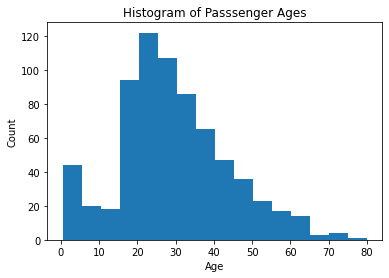

In [15]:
#plot of count of passengers per 5 year age group, excluding NaN ages

ageplot = age.plot.hist(title = "Histogram of Passsenger Ages", bins = 16)
ageplot.set_xlabel("Age")
ageplot.set_ylabel("Count")

In [16]:
#calculating average age per sex, pclass group

agebygroup = titanic_data.groupby(['Sex', 'Pclass']).agg(mean = ('Age', np.mean))
listgroup = agebygroup.reset_index().values.tolist()
agebygroup


mean
Sex    Pclass           
female 1       34.518072
       2       28.431507
       3       21.755000
male   1       41.228776
       2       30.477629
       3       26.465680

In [17]:
#I want to loop through each NaN age passenger and match sex, pclass then fill NaN
#to average age per sex, pclass. This is likely too inefficient. tried itertruples, iterrows


#stack overflow: https://stackoverflow.com/questions/43222878/iterate-over
#-pandas-dataframe-and-update-the-value-attributeerror-cant-set-a

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 1)
titanic_data.loc[mask, 'Age'] = 34.518072

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 2)
titanic_data.loc[mask, 'Age'] = 28.431507

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'female') & (titanic_data['Pclass'] == 3)
titanic_data.loc[mask, 'Age'] = 21.755000

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 1)
titanic_data.loc[mask, 'Age'] = 41.228776

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 2)
titanic_data.loc[mask, 'Age'] = 30.477629

mask = (titanic_data['Age'].isnull()) & (titanic_data['Sex'] == 'male') & (titanic_data['Pclass'] == 3)
titanic_data.loc[mask, 'Age'] = 26.465680

#check if any ages are still NaN values
titanic_data.isnull().sum()
    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          682
Embarked         0
dtype: int64

Text(0, 0.5, 'Count')

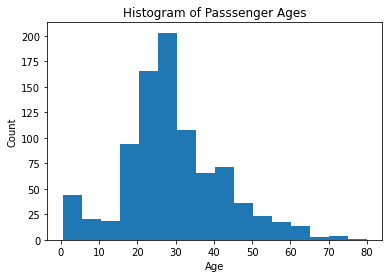

In [18]:
#plot of count of passengers per 5 year age group, excluding NaN ages
newage = titanic_data['Age']
newageplot = newage.plot.hist(title = "Histogram of Passsenger Ages", bins = 16)
newageplot.set_xlabel("Age")
newageplot.set_ylabel("Count")

Around 20-40 years of age, the jump from bar to bar is much steeper than my initial histogram (of non-NaN ages). While the original graph had a steady decline from 30 onwards, this graph sharply jumps down between 20 and 30. This is because of the way I decided to clean the data; had I filled in NaN values using a more precise prediction, I believe the bars would be smoother. I would then not be adding many passengers to the ~25 age range.

In [19]:
### I dropped Cabin and Ticket columns because they seem quite irrelevant. 
#Not sure what I could do with them.

titanic_data = titanic_data.drop(columns = ['Cabin', 'Ticket'])
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,34.518072,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.755000,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


I initially wanted to make this much more detailed; I wanted to find the average age by gender, survived, and pclass because I felt these would be most representative measures of a passenger's age. Obviously, I could not find a more efficient method of doing so, so I settled with only grouping by gender and pclass. Had I grouped by more atrributes, it would have been much too inefficient with lots of repeated code. Currently, there are only 6 total cases for each gender and pclass combo.

In [20]:
#checking to see if all NaN ages have been resolved
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [21]:
#Just checking to see that every passenger has a different name... means 
#each is probably a different person if value matches # of rows above.
titanic_data['Name'].nunique()

886

In [22]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,34.518072,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.755000,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [23]:
#curious about how much each passenger paid
fare = titanic_data['Fare']
fare.describe()

count    886.000000
mean      32.311784
std       49.811064
min        0.000000
25%        7.903100
50%       14.454200
75%       31.206250
max      512.329200
Name: Fare, dtype: float64

In [24]:
free = titanic_data.loc[titanic_data['Fare'] == 0]
len(free.index)

15

In [25]:
free

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,30.477629,0,0,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.477629,0,0,0.0,S
466,467,0,2,"Campbell, Mr. William",male,30.477629,0,0,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,30.477629,0,0,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,41.228776,0,0,0.0,S


There are 15 passengers who boarded the Titanic for free. Looking purely at the number, I wondered if they traveled with someone else who paid for their ticket (hence how they didn't pay a single penny), but from SibSp and Parch columns they clearly boarded by themselves. Interestingly enough, there is a good amount in each Pclass, and all of them are male and boarded from S. These could possibly be workers. 1st class workers may be the architects who worked on the Titanic, 3rd class workers could be people literally exchanging labor for this chance. Just some thoughts!

In [26]:
#Split passengers by quartile
titanic_data_sorted = titanic_data.sort_values(by=['Fare'])
quart1 = titanic_data_sorted.loc[(titanic_data_sorted['Fare'] >= 0)&(titanic_data_sorted['Fare'] < 7.903100)]
quart2 = titanic_data_sorted.loc[(titanic_data_sorted['Fare'] >= 7.903100) & (titanic_data_sorted['Fare'] < 14.454200)]
quart3 = titanic_data_sorted.loc[(titanic_data_sorted['Fare'] >= 14.454200) & (titanic_data_sorted['Fare'] < 31.206250)]
quart4 = titanic_data_sorted.loc[(titanic_data_sorted['Fare'] > 31.206250)]

In [27]:
#Count of Survived passengers by quartile
q1surv = quart1['Survived'].sum()
q2surv = quart2['Survived'].sum()
q3surv = quart3['Survived'].sum()
q4surv = quart4['Survived'].sum()

qsurv = [q1surv, q2surv, q3surv, q4surv]
qsurv

[44, 66, 100, 129]

([<matplotlib.axis.XTick at 0x7fde48e695e0>,
 [Text(0, 0, '1st Quartile'),
  Text(1, 0, '2nd Quartile'),
  Text(2, 0, '3rd Quartile'),
  Text(3, 0, '4th Quartile')])

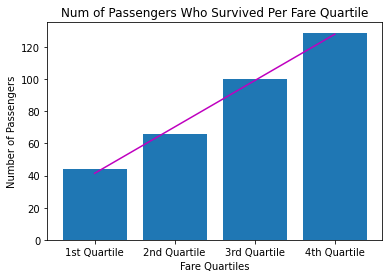

In [28]:
#Bar graph for fare quartile vs survival count
x = ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']
x_axis = np.arange(len(x))
plt.bar(x_axis, qsurv)
plt.xlabel('Fare Quartiles')
plt.ylabel('Number of Passengers')
plt.title('Num of Passengers Who Survived Per Fare Quartile')

#best fit line
m, b = np.polyfit(x_axis, qsurv, 1)
surv_f = [float(x) for x in qsurv]
plt.plot (x_axis, m*x_axis+b, 'm-')

#gets rid of numerical ticks on bottom, change to var x values
plt.xticks(x_axis, x)

Though not perfect, it is clear there is some linear correlation between how much a passenger pays for their ticket and whether or not they survived. Passengers who paid an amount in the first quartile had the lowest number of survived passengers, whereas passengers who paid higher amounts such as the fourth quartile had a much higher number of survived passengers. It is very interesting how there seems to be a linear relationship at all; while I expected there to be a positive correlation between ticket price and survival rate, I did not know what to expect in terms of the actual relationship. 

In [29]:
#Split these fare quartiles by gender, see who survived
q1sexsurv = quart1.groupby(['Sex'])['Survived'].sum().tolist()
q2sexsurv = quart2.groupby(['Sex'])['Survived'].sum().tolist()
q3sexsurv = quart3.groupby(['Sex'])['Survived'].sum().tolist()
q4sexsurv = quart4.groupby(['Sex'])['Survived'].sum().tolist()

qsexsurv = [q1sexsurv, q2sexsurv, q3sexsurv, q4sexsurv]
qsexsurv

#Rearrange values into male and female lists
female = []
male = []
for quartile in qsexsurv:
    female.append(quartile[0])
    male.append(quartile[1])
print(female, male)

[30, 41, 65, 95] [14, 25, 35, 34]


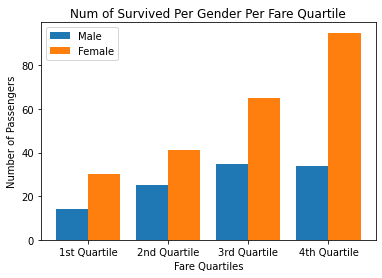

In [30]:
x = ['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile']
x_axis = np.arange(len(x))
plt.bar(x_axis - .2, male, .4, label = 'Male')
plt.bar(x_axis + .2, female, .4, label = 'Female')

#gets rid of numerical ticks on bottom, change to var x values
plt.xticks(x_axis, x)

plt.xlabel('Fare Quartiles')
plt.ylabel('Number of Passengers')
plt.title('Num of Survived Per Gender Per Fare Quartile')
plt.legend()
plt.show()

In [31]:
#Switch to looking at classes rather than fare quartiles
class1 = titanic_data.loc[(titanic_data['Pclass'] == 1)]
class2 = titanic_data.loc[(titanic_data['Pclass'] == 2)]
class3 = titanic_data.loc[(titanic_data['Pclass'] == 3)]

c1sexsurv = class1.groupby(['Sex'])['Survived'].sum().tolist()
c2sexsurv = class2.groupby(['Sex'])['Survived'].sum().tolist()
c3sexsurv = class3.groupby(['Sex'])['Survived'].sum().tolist()

csexsurv = [c1sexsurv, c2sexsurv, c3sexsurv]
csexsurv

femaleclass = []
maleclass = []
for cl in csexsurv:
    femaleclass.append(cl[0])
    maleclass.append(cl[1])
print(femaleclass, maleclass)

[91, 69, 71] [45, 17, 46]


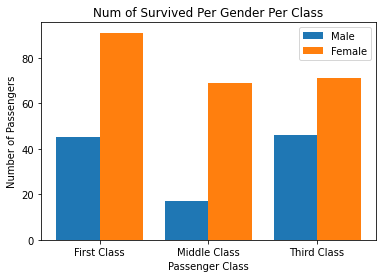

In [32]:
x = ['First Class', 'Middle Class', 'Third Class']
x_axis = np.arange(len(x))
plt.bar(x_axis - .2, maleclass, .4, label = 'Male')
plt.bar(x_axis + .2, femaleclass, .4, label = 'Female')

#gets rid of numerical ticks on bottom, change to var x values
plt.xticks(x_axis, x)

plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Num of Survived Per Gender Per Class')
plt.legend()
plt.show()

Seeing the bars, I am curious about the percentage breakdowns by class and by gender. I first create pie charts by gender split by class, then I create pie charts by class split by gender. 

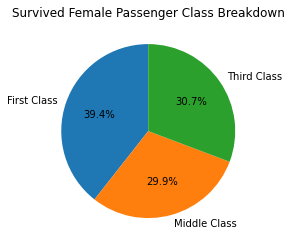

In [33]:
#Pie Chart splitting survived female passengers by class
labels = 'First Class', 'Middle Class', 'Third Class'
plt.pie(femaleclass, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('Survived Female Passenger Class Breakdown')
plt.show()

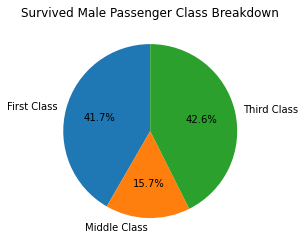

In [34]:
#Pie Chart splitting survived male passengers by class
labels = 'First Class', 'Middle Class', 'Third Class'
plt.pie(maleclass, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('Survived Male Passenger Class Breakdown')
plt.show()

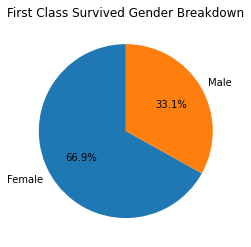

In [35]:
#Pie Chart splitting survived first class passengers by gender
labels = 'Female', 'Male'
plt.pie(c1sexsurv, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('First Class Survived Gender Breakdown')
plt.show()

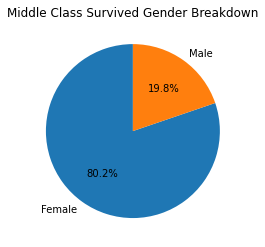

In [36]:
#Pie Chart splitting survived middle class passengers by gender
labels = 'Female', 'Male'
plt.pie(c2sexsurv, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('Middle Class Survived Gender Breakdown')
plt.show()

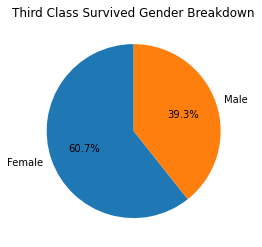

In [37]:
#Pie Chart splitting survived third class passengers by gender
labels = 'Female', 'Male'
plt.pie(c3sexsurv, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('Third Class Survived Gender Breakdown')
plt.show()

In [38]:
#group by pclass, compare survival rates
data = titanic_data.filter(items = ['Pclass', 'Survived'])

survived = data.loc[data['Survived'] == 1].groupby(['Pclass']).size()
died = data.loc[data['Survived'] == 0].groupby(['Pclass']).size()

In [39]:
survived_lst = survived.to_list()
died_lst = died.to_list()

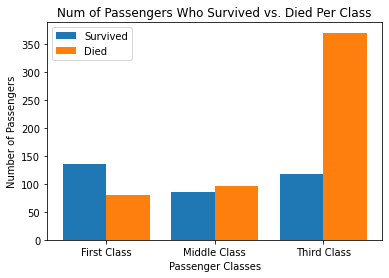

In [40]:
x = ['First Class', 'Middle Class', 'Third Class']
X_axis = np.arange(len(x))
plt.bar(X_axis - .2, survived_lst, .4, label = 'Survived')
plt.bar(X_axis + .2, died_lst, .4, label = 'Died')

#gets rid of numerical ticks on bottom, change to var x values
plt.xticks(X_axis, x)

plt.xlabel('Passenger Classes')
plt.ylabel('Number of Passengers')
plt.title('Num of Passengers Who Survived vs. Died Per Class')
plt.legend()
plt.show()

Obviously, there are much more third class passengers than first class and second class, but I am curious to visualize the split of classes.

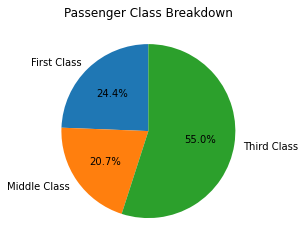

In [41]:
#Pie Chart splitting passengers by class
classsize = titanic_data.groupby(['Pclass']).size()
classsize_lst = classsize.to_list()

labels = 'First Class', 'Middle Class', 'Third Class'
plt.pie(classsize_lst, labels = labels, autopct = '%1.1f%%',startangle = 90)
plt.title('Passenger Class Breakdown')
plt.show()

Overall, I wish I had more time; me being relatively new to Pandas meant I spent a significant amount of time figuring out which methods to use for each step, and I struggled with just having so many errors (type error, assignment error, x+y must be same shape, df does not support __ method, etc) until finally something worked. 

The portion I struggled the most on was definitely cleaning up the Age column. I felt like there were just so many ways to go about filling in these NaN values (obviously removing these passengers would be a bad idea, but possibilities such as finding mean age using combination of different columns). I tried many, many different methods, but halfway through I would realize the way I was attemping to do it was incredibly inefficient, and then I switched or altered my process by reducing the number of columns I wanted to use. I would love to learn of more efficient ways to perform similar calculations and transformations I did.

If I could do this again, I would probably try to take a crashcourse on Pandas before just diving in; that would probably have introduced me to some more relevant methods that I could have used in this little project!

Given more time, I would love to look at the survival rates by age. Obviously, the average age of women per passenger class who lived would be different from that of men. However, this would create a lot of different subcategories, and I would need a lot of time brainstorming how to organize this information into a single graph to better visualize the categories. 